# movie lens viz

In [1]:
from surprise import Dataset, Reader
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from movie_lens_data import get_movie_lens

ml_ver = '25m'
def printver():
    print(f'movie lens version: {ml_ver}\n')

ml_ratings_df = get_movie_lens(ml_ver)
ml_ratings_df['timestamp'] = pd.to_datetime(ml_ratings_df['timestamp'], unit='s')

printver()
print(ml_ratings_df.head(5))

movie lens version: 25m

   userId  movieId  rating           timestamp
0       1      296     5.0 2006-05-17 15:34:04
1       1      306     3.5 2006-05-17 12:26:57
2       1      307     5.0 2006-05-17 12:27:08
3       1      665     5.0 2006-05-17 15:13:40
4       1      899     3.5 2006-05-17 12:21:50


In [2]:
ml_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userId     int64         
 1   movieId    int64         
 2   rating     float64       
 3   timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 762.9 MB


In [3]:
printver()

total_ratings_count = len(ml_ratings_df)
print(f'{total_ratings_count=}')

unique_users = len(ml_ratings_df['userId'].unique())
print(f'{unique_users=}')

unique_movies = len(ml_ratings_df['movieId'].unique())
print(f'{unique_movies=}')

density = total_ratings_count / (unique_users * unique_movies)
density = str(round(density * 100, 2)) + '%'
print(f'{density=}')

possible_ratings = np.sort(ml_ratings_df.rating.unique())
print(f'{possible_ratings=}')

movie lens version: 25m

total_ratings_count=25000095
unique_users=162541
unique_movies=59047
density='0.26%'
possible_ratings=array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])


movie lens version: 25m



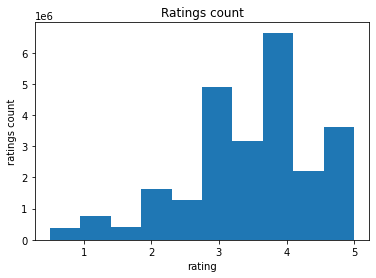

In [4]:
printver()
temp, _, _ = plt.hist(ml_ratings_df.rating.to_numpy(), bins=len(possible_ratings))
plt.xlabel('rating')
plt.ylabel('ratings count')
plt.title('Ratings count')
plt.show()

movie lens version: 25m



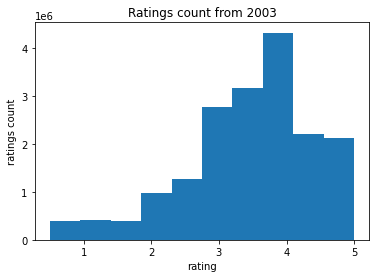

In [5]:
printver()
temp, _, _ = plt.hist(ml_ratings_df[ml_ratings_df.timestamp > dt(year=2003, month=1, day=1)].rating.to_numpy(), bins=len(possible_ratings))
plt.xlabel('rating')
plt.ylabel('ratings count')
plt.title('Ratings count from 2003')
plt.show()

movie lens version: 25m



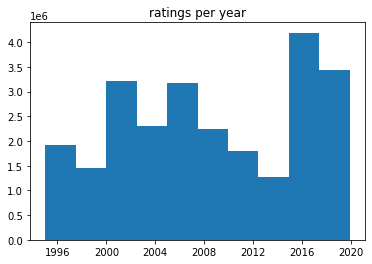

In [6]:
printver()
plt.hist(x=ml_ratings_df.timestamp)
plt.title('ratings per year')
plt.show()

movie lens version: 25m



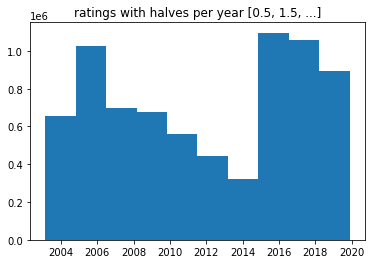

In [7]:
printver()
time_np = ml_ratings_df.timestamp.to_numpy()
rating_np = ml_ratings_df.rating.to_numpy()
time_np = time_np[rating_np.astype(np.int) != rating_np]
plt.hist(x=time_np)
plt.title('ratings with halves per year [0.5, 1.5, ...]')
plt.show()

movie lens version: 25m

min ratings by a single user:  20
max ratings by a single user:  32202


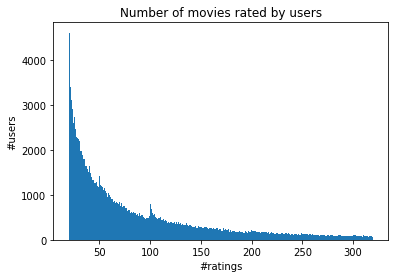

In [14]:
printver()
ratings_count_per_user = ml_ratings_df[['userId', 'movieId']].groupby('userId').count()
print('min ratings by a single user: ', ratings_count_per_user.movieId.min())
print('max ratings by a single user: ', ratings_count_per_user.movieId.max())

ratings_count_per_user = ml_ratings_df[['userId', 'movieId']].groupby('userId').count()
ratings_count_per_user = ratings_count_per_user['movieId'].to_numpy()

u, c = np.unique(ratings_count_per_user, return_counts=True)
u, c = u[:300], c[:300]

plt.bar(u, c, width=1)
plt.title('Number of movies rated by users')
plt.xlabel('#ratings')
plt.ylabel('#users')
plt.show()

movie lens version: 25m

min ratings for a single movie:  1
max ratings for a single movie:  81491


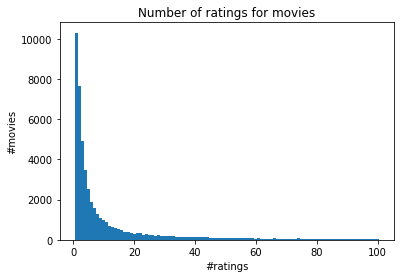

In [13]:
printver()
ratings_count_per_movie = ml_ratings_df[['userId', 'movieId']].groupby('movieId').count()
print('min ratings for a single movie: ', ratings_count_per_movie.userId.min())
print('max ratings for a single movie: ', ratings_count_per_movie.userId.max())

ratings_count_per_movie = ml_ratings_df[['userId', 'movieId']].groupby('movieId').count()
ratings_count_per_movie = ratings_count_per_movie['userId'].to_numpy()

u, c = np.unique(ratings_count_per_movie, return_counts=True)
u, c = u[:100], c[:100]

plt.bar(u, c, width=1)
plt.title('Number of ratings for movies')
plt.xlabel('#ratings')
plt.ylabel('#movies')
plt.show()

movie lens version: 25m



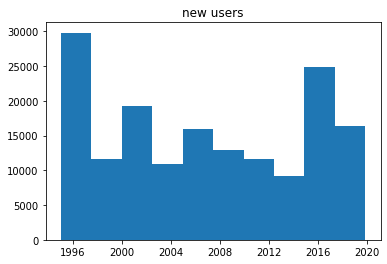

In [10]:
printver()
new_users = ml_ratings_df[['userId', 'timestamp']].groupby('userId').min()
new_users = new_users.timestamp.to_numpy()
plt.hist(new_users)
plt.title('new users')
plt.show()

movie lens version: 25m



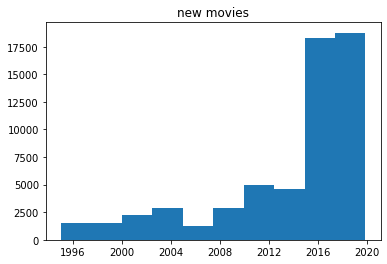

In [11]:
printver()
movie_first_rated = ml_ratings_df[['movieId', 'timestamp']].groupby('movieId').min()
movie_first_rated = movie_first_rated.timestamp.to_numpy()
plt.hist(movie_first_rated)
plt.title('new movies')
plt.show()